<font color='red'><h1>Phishing Website Detection by Machine Learning Techniques</h1></font>

<font color='blue'><h2>Load the data</h2></font>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('dataset/CombinedDataset.csv')
data.head()

,Domain,Have_IP,Have_At,Prefix&Suffix,TinyURL,Redirection,URL_length,URL_Depth,DNS_Record,Domain_Age,Domain_End,Label
0,graphicriver.net,0,0,0,0,0,1,1,1,1,1,0
1,ecnavi.jp,0,0,0,0,1,1,1,1,1,1,0
2,hubpages.com,0,0,0,0,0,1,1,1,1,1,0
3,extratorrent.cc,0,0,0,0,0,3,1,1,1,1,0
4,icicibank.com,0,0,0,0,0,3,1,1,1,1,0


<font color='blue'><h2>Understanding the data</h2></font>

In [3]:
data.shape

(10000, 12)

In [4]:
data.columns

Index(['Domain', 'Have_IP', 'Have_At', 'Prefix&Suffix', 'TinyURL',
       'Redirection', 'URL_length', 'URL_Depth', 'DNS_Record', 'Domain_Age',
       'Domain_End', 'Label'],
      dtype='object')

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Domain         10000 non-null  object
 1   Have_IP        10000 non-null  int64 
 2   Have_At        10000 non-null  int64 
 3   Prefix&Suffix  10000 non-null  int64 
 4   TinyURL        10000 non-null  int64 
 5   Redirection    10000 non-null  int64 
 6   URL_length     10000 non-null  int64 
 7   URL_Depth      10000 non-null  int64 
 8   DNS_Record     10000 non-null  int64 
 9   Domain_Age     10000 non-null  int64 
 10  Domain_End     10000 non-null  int64 
 11  Label          10000 non-null  int64 
dtypes: int64(11), object(1)
memory usage: 937.6+ KB


<function matplotlib.pyplot.show(close=None, block=None)>

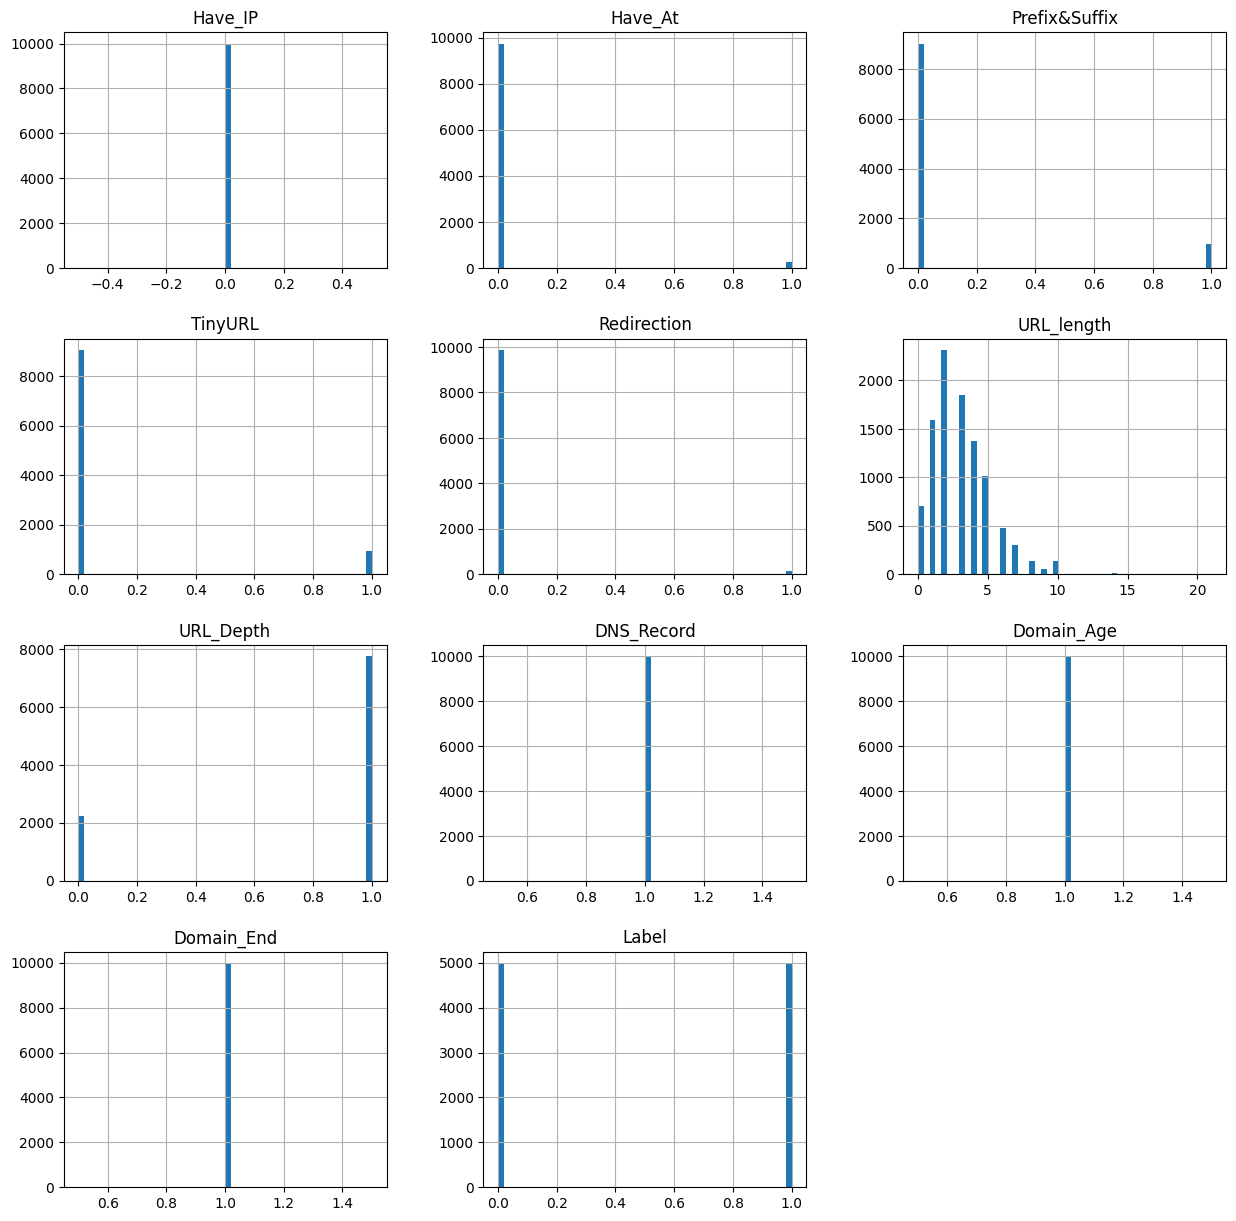

In [6]:
data.hist(bins = 50, figsize = (15,15))
plt.show

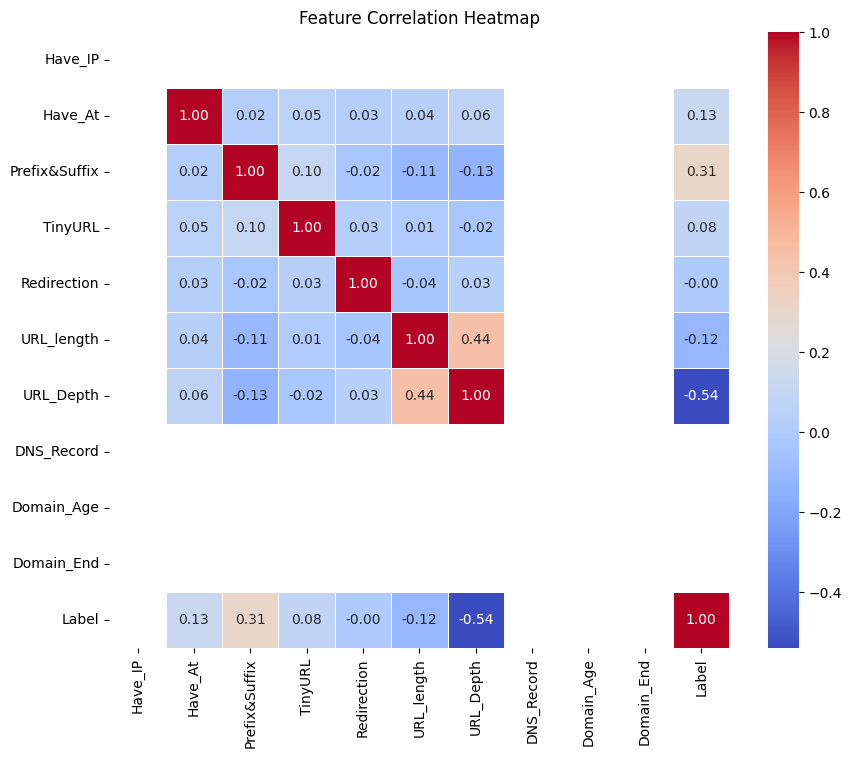

In [7]:
# Drop the 'Domain' column (since it's non-numeric)
df_numeric = data.drop(columns=['Domain'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

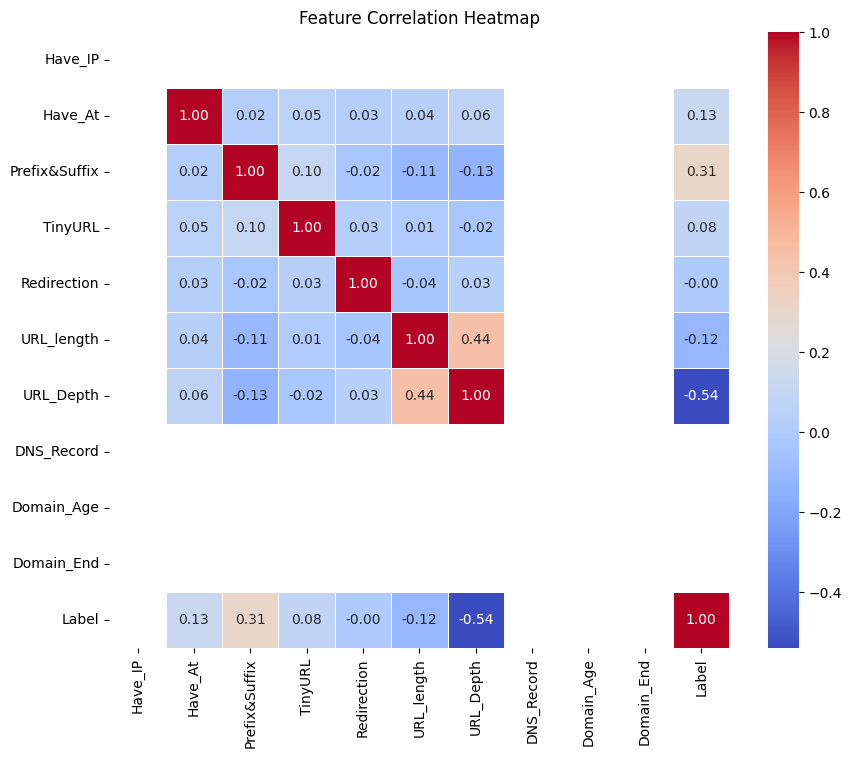

In [8]:
#droping the domain column since it's non-numeric
df_numeric = data.drop(columns=['Domain'])

# Compute correlation matrix
corr_matrix = df_numeric.corr()

# Plot heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.show()

<font color='blue'><h2>EDA</h2></font>

In [9]:
data.describe()

,Have_IP,Have_At,Prefix&Suffix,TinyURL,Redirection,URL_length,URL_Depth,DNS_Record,Domain_Age,Domain_End,Label
count,10000.0,10000.00000,10000.000000,10000.000000,10000.00000,10000.000000,10000.000000,10000.0,10000.0,10000.0,10000.000000
mean,0.0,0.02460,0.096600,0.093200,0.01300,3.079200,0.775300,1.0,1.0,1.0,0.500000
std,0.0,0.15491,0.295427,0.290727,0.11328,2.136582,0.417405,0.0,0.0,0.0,0.500025
min,0.0,0.00000,0.000000,0.000000,0.00000,0.000000,0.000000,1.0,1.0,1.0,0.000000
25%,0.0,0.00000,0.000000,0.000000,0.00000,2.000000,1.000000,1.0,1.0,1.0,0.000000
50%,0.0,0.00000,0.000000,0.000000,0.00000,3.000000,1.000000,1.0,1.0,1.0,0.500000
75%,0.0,0.00000,0.000000,0.000000,0.00000,4.000000,1.000000,1.0,1.0,1.0,1.000000
max,0.0,1.00000,1.000000,1.000000,1.00000,21.000000,1.000000,1.0,1.0,1.0,1.000000


In [10]:
#Dropping the Domain column
data = data.drop(['Domain'], axis = 1).copy()

In [11]:
#checking if there is null
data.isnull().sum()

Have_IP          0
Have_At          0
Prefix&Suffix    0
TinyURL          0
Redirection      0
URL_length       0
URL_Depth        0
DNS_Record       0
Domain_Age       0
Domain_End       0
Label            0
dtype: int64

In [12]:
data.head()

,Have_IP,Have_At,Prefix&Suffix,TinyURL,Redirection,URL_length,URL_Depth,DNS_Record,Domain_Age,Domain_End,Label
0,0,0,0,0,0,1,1,1,1,1,0
1,0,0,0,0,1,1,1,1,1,1,0
2,0,0,0,0,0,1,1,1,1,1,0
3,0,0,0,0,0,3,1,1,1,1,0
4,0,0,0,0,0,3,1,1,1,1,0


In [13]:
# shuffling the rows in the dataset so that when splitting the train and test set are equally distributed
data = data.sample(frac=1).reset_index(drop=True)
data.head()

,Have_IP,Have_At,Prefix&Suffix,TinyURL,Redirection,URL_length,URL_Depth,DNS_Record,Domain_Age,Domain_End,Label
0,0,0,0,0,0,6,1,1,1,1,1
1,0,0,0,1,0,5,1,1,1,1,0
2,0,0,0,0,0,1,0,1,1,1,1
3,0,0,0,1,0,4,1,1,1,1,0
4,0,0,0,0,0,2,1,1,1,1,0


<h2>Splitting the data</h2>

In [15]:
# Sepratating & assigning features and target columns to X & y
y = data['Label']
X = data.drop('Label',axis=1)

X.shape, y.shape
     

((10000, 10), (10000,))

In [16]:
# Splitting the dataset into train and test sets: 80-20 split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 12)
X_train.shape, X_test.shape

((8000, 10), (2000, 10))

<font color='red'><h2>Machine Learning Models & Training</h2></font>

<li>Decision Tree</li>
<li>Random Forest</li>
<li>XGBoost</li>
<li>Support Vector Machines</li>
<li>Multilayer Perceptrons</li>



In [17]:
#importing packages
from sklearn.metrics import accuracy_score

In [18]:
# Creating holders to store the model performance results
ML_Model = []
acc_train = []
acc_test = []

#function to call for storing the results
def storeResults(model, a,b):
  ML_Model.append(model)
  acc_train.append(round(a, 3))
  acc_test.append(round(b, 3))

<h3>Decision Tree Classifier</h3>

In [20]:

# Decision Tree model 
from sklearn.tree import DecisionTreeClassifier

# instantiate the model 
tree = DecisionTreeClassifier(max_depth = 5)
# fit the model 
tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [21]:
#predicting the target value from the model for the samples
y_test_tree = tree.predict(X_test)
y_train_tree = tree.predict(X_train)

In [22]:

#computing the accuracy of the model performance
acc_train_tree = accuracy_score(y_train,y_train_tree)
acc_test_tree = accuracy_score(y_test,y_test_tree)

print("Decision Tree: Accuracy on training Data: {:.3f}".format(acc_train_tree))
print("Decision Tree: Accuracy on test Data: {:.3f}".format(acc_test_tree))

Decision Tree: Accuracy on training Data: 0.807
Decision Tree: Accuracy on test Data: 0.798


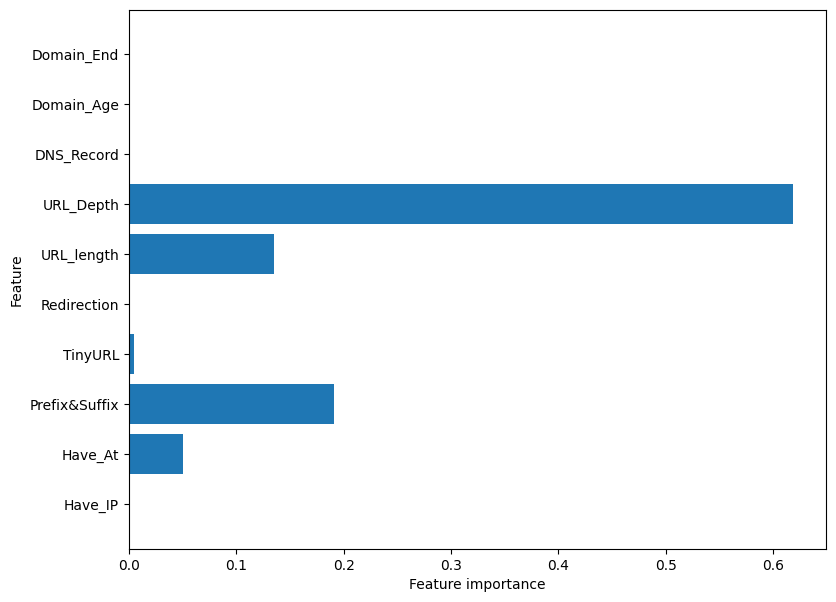

In [23]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), tree.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [24]:
#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Decision Tree', acc_train_tree, acc_test_tree)

<h3>Random Forest Classifier</h3>

In [25]:
# Random Forest model
from sklearn.ensemble import RandomForestClassifier

# instantiate the model
forest = RandomForestClassifier(max_depth=5)

# fit the model 
forest.fit(X_train, y_train)

RandomForestClassifier(max_depth=5)

In [26]:
#predicting the target value from the model for the samples
y_test_forest = forest.predict(X_test)
y_train_forest = forest.predict(X_train)

In [27]:
#computing the accuracy of the model performance
acc_train_forest = accuracy_score(y_train,y_train_forest)
acc_test_forest = accuracy_score(y_test,y_test_forest)

print("Random forest: Accuracy on training Data: {:.3f}".format(acc_train_forest))
print("Random forest: Accuracy on test Data: {:.3f}".format(acc_test_forest))

Random forest: Accuracy on training Data: 0.794
Random forest: Accuracy on test Data: 0.797


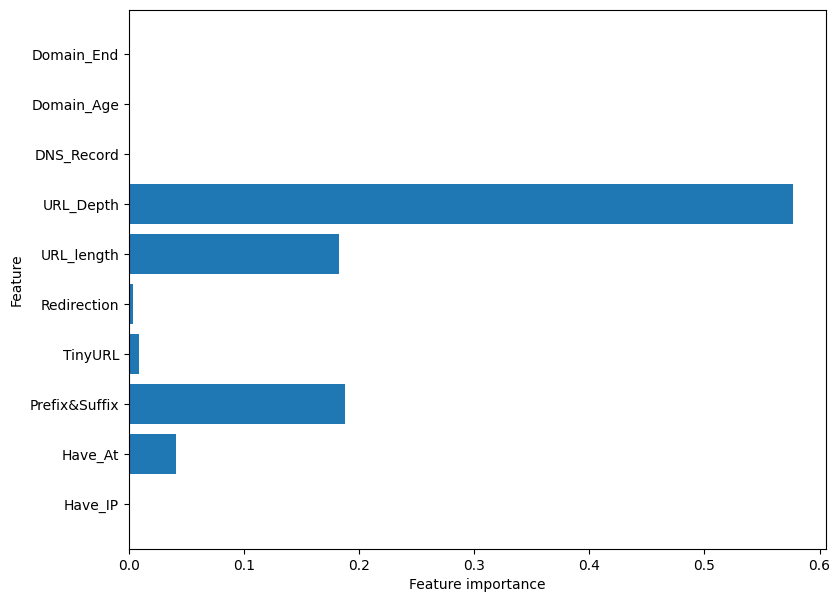

In [28]:
#checking the feature improtance in the model
plt.figure(figsize=(9,7))
n_features = X_train.shape[1]
plt.barh(range(n_features), forest.feature_importances_, align='center')
plt.yticks(np.arange(n_features), X_train.columns)
plt.xlabel("Feature importance")
plt.ylabel("Feature")
plt.show()

In [29]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('Random Forest', acc_train_forest, acc_test_forest)

<h3>XGBoost Classifier</h3>

In [30]:
#XGBoost Classification model
from xgboost import XGBClassifier

# instantiate the model
xgb = XGBClassifier(learning_rate=0.4,max_depth=7)
#fit the model
xgb.fit(X_train, y_train)
     

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.4, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

In [31]:
#predicting the target value from the model for the samples
y_test_xgb = xgb.predict(X_test)
y_train_xgb = xgb.predict(X_train)
     

In [32]:

#computing the accuracy of the model performance
acc_train_xgb = accuracy_score(y_train,y_train_xgb)
acc_test_xgb = accuracy_score(y_test,y_test_xgb)

print("XGBoost: Accuracy on training Data: {:.3f}".format(acc_train_xgb))
print("XGBoost : Accuracy on test Data: {:.3f}".format(acc_test_xgb))

XGBoost: Accuracy on training Data: 0.815
XGBoost : Accuracy on test Data: 0.814


In [33]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('XGBoost', acc_train_xgb, acc_test_xgb)

<h3>Support Vector Machines</h3>

In [34]:
#Support vector machine model
from sklearn.svm import SVC

# instantiate the model
svm = SVC(kernel='linear', C=1.0, random_state=12)
#fit the model
svm.fit(X_train, y_train)

SVC(kernel='linear', random_state=12)

In [35]:

#predicting the target value from the model for the samples
y_test_svm = svm.predict(X_test)
y_train_svm = svm.predict(X_train)

In [36]:
#computing the accuracy of the model performance
acc_train_svm = accuracy_score(y_train,y_train_svm)
acc_test_svm = accuracy_score(y_test,y_test_svm)

print("SVM: Accuracy on training Data: {:.3f}".format(acc_train_svm))
print("SVM : Accuracy on test Data: {:.3f}".format(acc_test_svm))

SVM: Accuracy on training Data: 0.792
SVM : Accuracy on test Data: 0.796


In [37]:

#storing the results. The below mentioned order of parameter passing is important.
#Caution: Execute only once to avoid duplications.
storeResults('SVM', acc_train_svm, acc_test_svm)

<font color='red'><h2>Comparision of Models</h2></font>

In [38]:
#creating dataframe
results = pd.DataFrame({ 'ML Model': ML_Model,    
    'Train Accuracy': acc_train,
    'Test Accuracy': acc_test})
results

,ML Model,Train Accuracy,Test Accuracy
0,Decision Tree,0.807,0.798
1,Random Forest,0.794,0.797
2,XGBoost,0.815,0.814
3,SVM,0.792,0.796


In [39]:
#Sorting the datafram on accuracy
results.sort_values(by=['Test Accuracy', 'Train Accuracy'], ascending=False)

,ML Model,Train Accuracy,Test Accuracy
2,XGBoost,0.815,0.814
0,Decision Tree,0.807,0.798
1,Random Forest,0.794,0.797
3,SVM,0.792,0.796


In [40]:
# save XGBoost model to file
import pickle
pickle.dump(xgb, open("XGBoostClassifier.pickle.dat", "wb"))

In [41]:

# load model from file
loaded_model = pickle.load(open("XGBoostClassifier.pickle.dat", "rb"))
loaded_model

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.4, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=7,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=None,
              n_jobs=None, num_parallel_tree=None, ...)

Refrences:<br>
https://archive.ics.uci.edu/dataset/327/phishing+websites <br>
https://pypi.org/project/python-whois/